In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 머신러닝의 종류

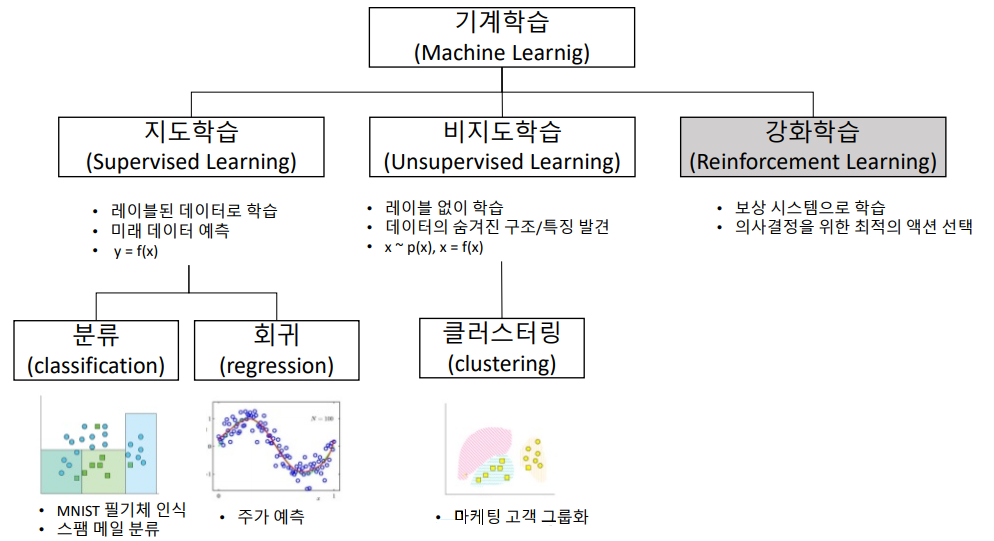

- 이미지 출처 : https://bestpractice80.tistory.com/2

# 회귀분석이란? 

#### 1. 가정해보기

카페 사장님이라고 생각해보세요.   
만약 평균 기온을 활용하여 내일의 아이스 아메리카노 판매량을 예측할 수 있다면? 

- 문제 정의
    - 데이터 : 과거 평균 기온(X)와 그에 따른 아이스 아메리카노 판매량(Y)
    - 가정 : 평균 기온과 판매량은 선형적인 관계를 가지고 있음 
    - 목표 : 평균 기온에 따른 아이스 아메리카노 판매량 예측하기 
- 해결 방안
    - 회귀 분석 
        - 연속형 종속변수(y, target)와 다양한 독립변수의 관계를 모형화하여 목표변수를 분석, 예측하는 기법
        - 종속변수에 영향을 미치는 독립변수를 찾고, 종속변수의 값을 예측하는 것이 목적

    - 활용
        - 광고 지출액에 따라 매출액은 어떻게변하는가?
        - 담배 판매량이 증가하면폐암 환자수도증가하는가? 

In [ ]:
pd.DataFrame({"평균 기온" : [10, 17, 23, 33], "아이스 아메리카노 판매량(천)" : [20, 23, 33, 40]})

,평균 기온,아이스 아메리카노 판매량(천)
0,10,20
1,17,23
2,23,33
3,33,40


## 선형회귀(Linear Regression)란? 

### 단순 선형 회귀

- 회귀의 목표는 연속형 반응 변수의 값을 예측하는 것
- 단순 선형 회귀라는 것은 독립변수와 종속변수 간에 선형관계가 있다고 가정하고, 초평면이라고 하는 선형 평면을 이용해 모델링 하는 것

$$
y = ax + b   (a는 기울기, b는 절편) 
$$



- 알고리즘을 이용해 최적의 a와 b값을 찾아내는 것이 목표
    - 데이터를 가장 잘 설명하는 선을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * X - 5 + rng.randn(50) # 분산 추가

X, y

(array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
        8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
        8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
        1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
        9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
        6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
        9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
        1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
        2.87775339e+00, 1.30028572e+00]),
 array([ 2.65326739,  8.56128423, -5.66895863,  1.03398685, -3.18219253,
        -2.91881241, 

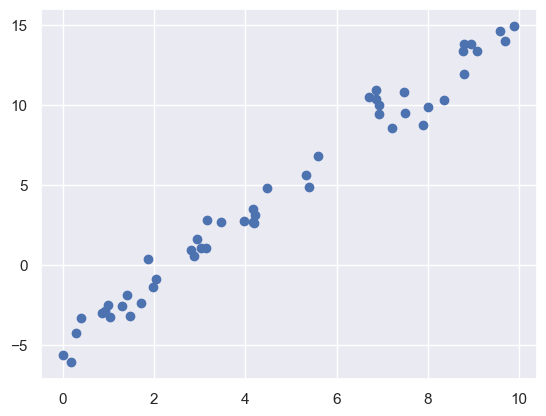

In [ ]:
plt.scatter(X, y);

In [ ]:
X = X.reshape(-1, 1)
print(X.shape)


(50, 1)


In [ ]:
# 모델 임포트 
from sklearn.linear_model import LinearRegression

# 모델 인스턴스 생성
lin_reg = LinearRegression()

In [ ]:
# 모델 피팅
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
# 모델 예측
y_pred = lin_reg.predict(X)
y_pred

array([ 3.45532973,  9.60390451, -4.99625847,  1.13033546, -2.02352874,
       -3.12668096, -1.22269367,  2.00666042,  3.04472811,  5.92436322,
        3.49937104,  8.892253  , -0.85390307, 12.80269695, -4.44337338,
        8.59319935,  3.46106263,  6.32723234, -2.1526407 , -0.98264625,
       11.23418736, 14.63010688,  1.35518547,  9.03624798, 12.76766102,
       13.13696802, -3.27455334, -4.20685508, -1.55575986, 12.80320511,
       -3.00488141,  3.53815379, 14.41984386,  5.80979655,  9.02721673,
        1.39758358,  8.9182302 , 11.92102807, -4.62783552, 10.20841456,
       15.04770203, 10.16830298,  0.68660823, 11.001763  , -2.90597039,
        4.08115994, 13.420551  ,  0.9535948 ,  0.83522993, -2.36262642])

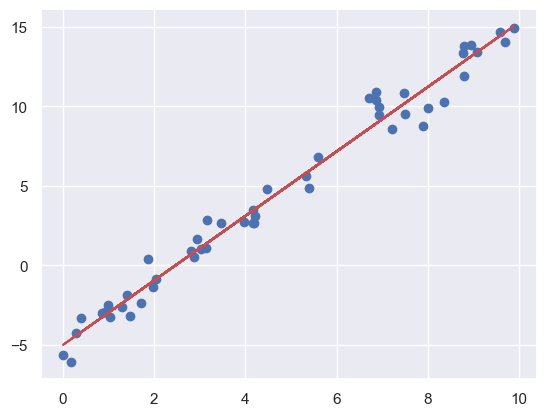

In [ ]:
# 시각화
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-');

In [ ]:
print("모델의 기울기:", end = ' ')
print(lin_reg.coef_[0])

print("모델의 절편:", end = ' ')
lin_reg.intercept_

모델의 기울기: 2.027208810360696
모델의 절편: 

-4.9985770855532055

### 어떻게 최적의 선을 찾을까 ?

선형회귀의 알고리즘은 "최소 제곱법"을 사용
- 예측 오차(실제 값과 예측값의 차이)를 최소화해라! 

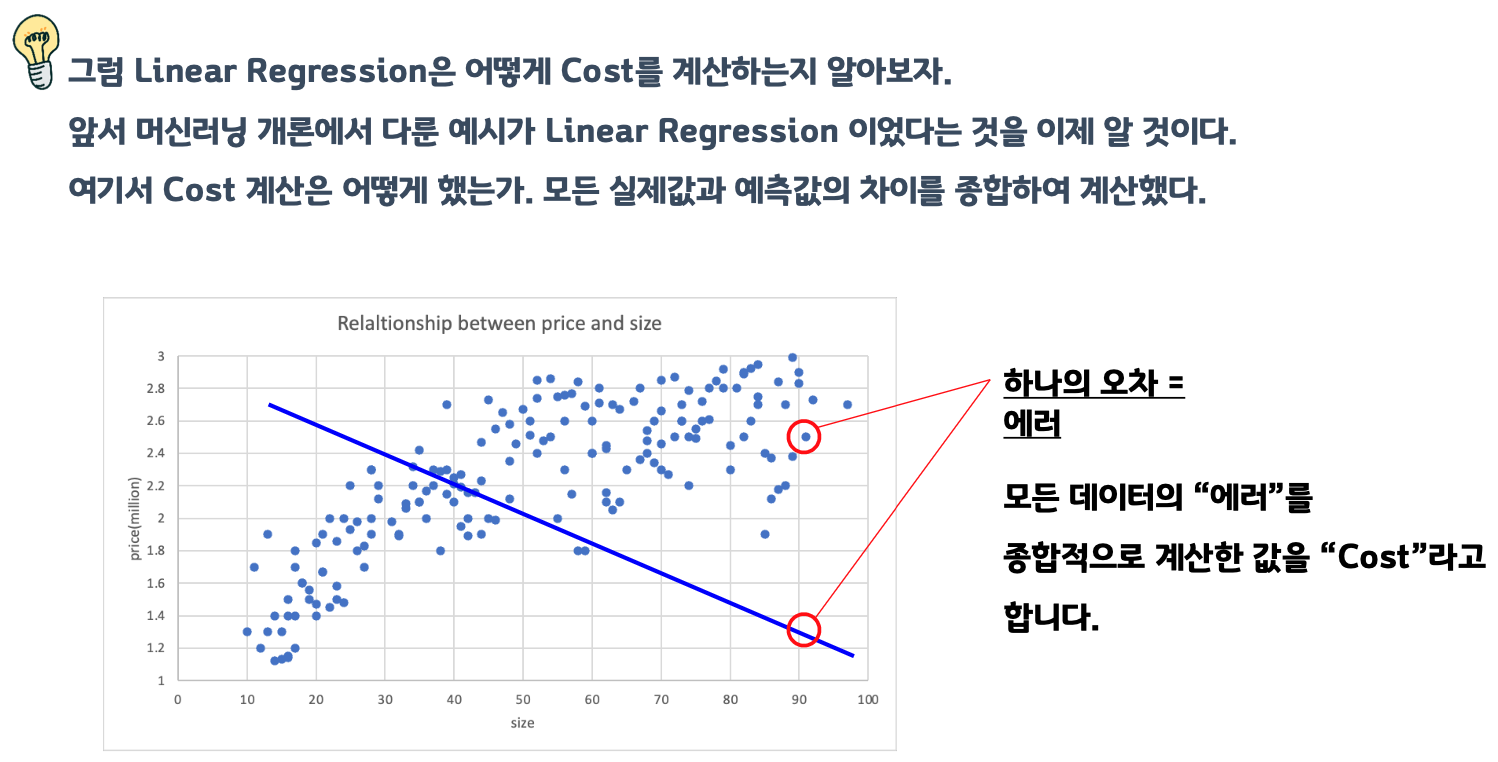

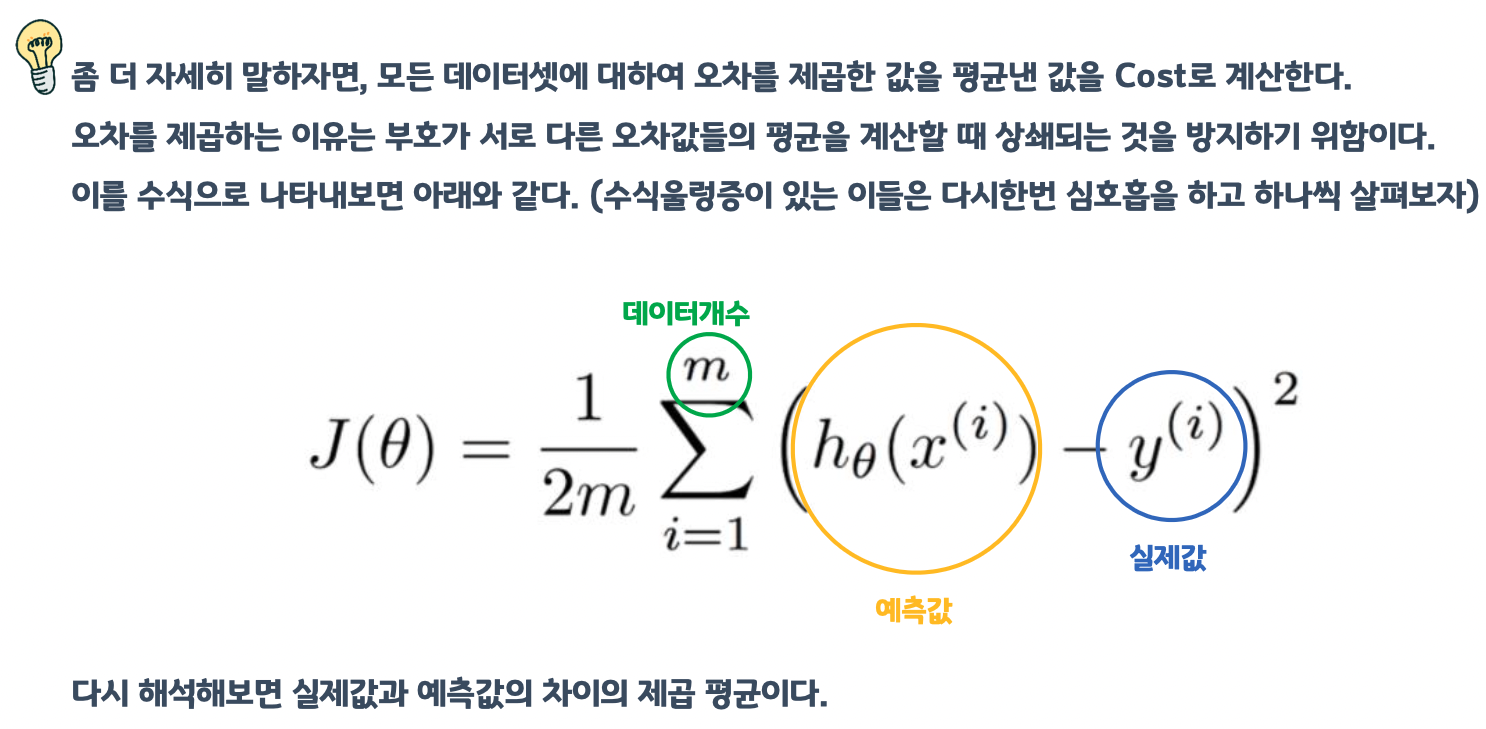

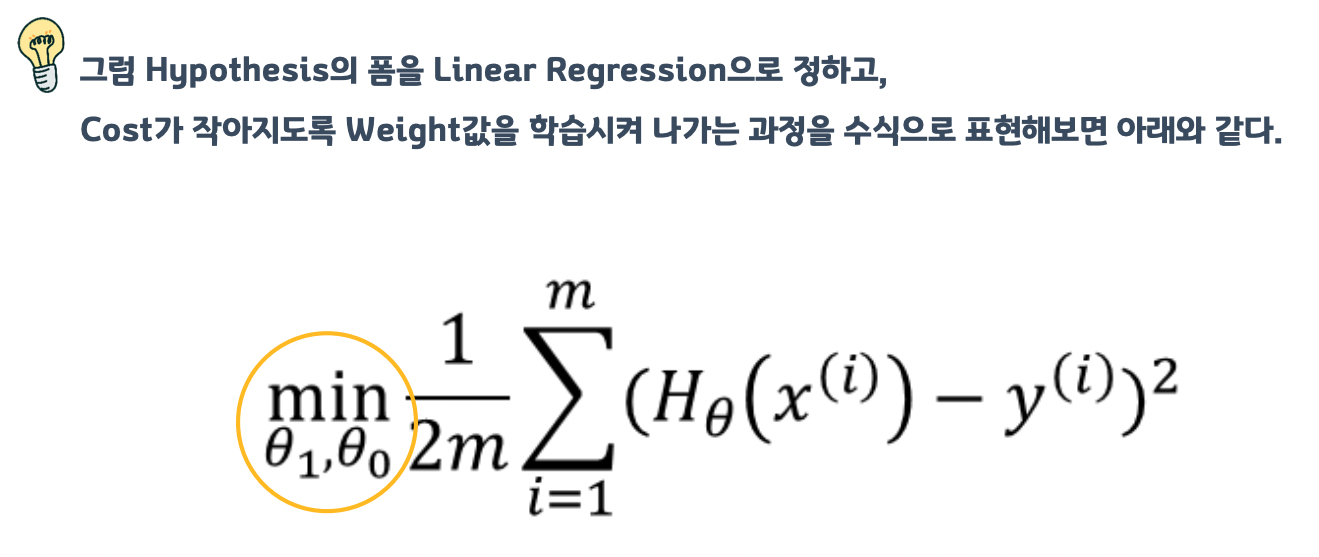

### 어떤 모델이 좋은 모델일까? (단순 선형 회귀모델의 평가)



#### 결정계수 
- 회귀 모델의 기본 예측 능력 평가 지표 : 결정계수 $ R^2 $
- $ 0 <= R^2 <= 1 $
- 현재 regression이 데이터의 분산을 얼마나 설명하는가
- 1에 가까울 수록 좋음
- 다만 설명계수는 변수(특징)이 많아지만 값이 커지는 문제가 있음

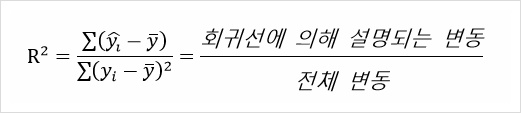

- 이미지 출처 : https://mansoostat.tistory.com/76

In [ ]:
lin_reg.score(X, y)

0.9790800609430612

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9790800609430612

#### 평균 제곱근 오차 (RMSE : Root Mean Square Error)
- 분산의 제곱근, 즉 표준오차를 말함

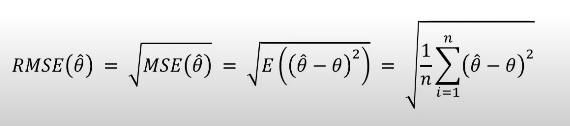

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y)
mse = np.sqrt(mse)
mse

0.9046208360559783

### 다중 선형 회귀

#### 문제
- 만약 입력값에 강수량이 추가된다면?
- 즉 평균기온과 평균 강수량에 따른 아이스 아메리카노 판매량을 예측하고자 할때

문제해결 
- 여러 개의 입력값(Xn)으로 결과값(Y)을 예측하고자 하는 경우 
- 다중 선형 회귀(Multiple Linear Regression)

다중 선형 회귀 특징

- 회귀의 목표는 연속형 반응 변수의 값을 예측하는 것
- 다중 선형 회귀라는 것은 독립변수 n개의 특징과 종속변수 1개간에 선형관계가 있다고 가정하고, 초평면이라고 하는 선형 평면을 이용해 모델링 하는 것
- 독립변수 n차원, 반응 변수 1차원 -> 모델 n+1차원
- 초평면 n 차원

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

X.shape, y.shape

((100, 3), (100,))

In [ ]:
X

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00, 3.96767474e+00],
       [5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01],
       [6.70467510e+00, 4.17304802e+00, 5.58689828e+00],
       [1.40386939e+00, 1.98101489e+00, 8.00744569e+00],
       [9.68261576e+00, 3.13424178e+00, 6.92322616e+00],
       [8.76389152e+00, 8.94606664e+00, 8.50442114e-01],
       [3.90547832e-01, 1.69830420e+00, 8.78142503e+00],
       [9.83468338e-01, 4.21107625e+00, 9.57889530e+00],
       [5.33165285e+00, 6.91877114e+00, 3.15515631e+00],
       [6.86500928e+00, 8.34625672e+00, 1.82882773e-01],
       [7.50144315e+00, 9.88861089e+00, 7.48165654e+00],
       [2.80443992e+00, 7.89279328e+00, 1.03226007e+00],
       [4.47893526e+00, 9.08595503e+00, 2.93614148e+00],
       [2.87775339e+00, 1.30028572e+00, 1.93669579e-01],
       [6.78835533e+00, 2.11628

In [ ]:
# 직접 해보세요! 

# 모델 임포트 


# 모델 학습

In [ ]:
# 모델 절편 및 계수 확인
print(lin_reg.intercept_)
print(lin_reg.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


다중 선형 회귀는
- 여러 개의 입력값과 결과값 같의 관계 확인 가능
- 어떤 입력값이 겨로가값에 어떠한 영향을 미치는지 알 수 있음
- 여러 개의 입력값 사이 간에 "상관관계"가 높을 경우 결과에 대한 신뢰성을 잃을 가능성이 있음. 

# 실제 데이터로 회귀분석하기

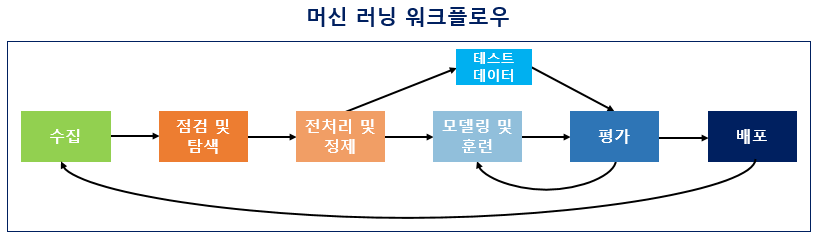

1. 데이터 수집 (Acquisition)
    - 머신 러닝을 하기 위해서는 기계에 학습시켜야 할 데이터가 필요합니다. 풀고자 하는 문제에 맞는 데이터를 다양한 형태로 수집합니다. 
2. 점검 및 탐색(Inspection and exploration)
    - 데이터가 수집되었다면, 이제 데이터를 점검하고 탐색하는 단계입니다. 
    - 여기서는 데이터의 구조, 노이즈 데이터, 머신 러닝 적용을 위해서 데이터를 어떻게 정제해야하는지 등을 파악해야 합니다. 
    - 이 단계를 **탐색적 데이터 분석(Exploratory Data Analysis, EDA) 단계**라고도 하는데 이는 독립 변수, 종속 변수, 변수 유형, 변수의 데이터 타입 등을 점검하며 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정을 의미합니다. 
    - 이 과정에서 시각화와 간단한 통계 테스트를 진행하기도 합니다.
3. 전처리 및 정제(Preprocessing and Cleaning) 
    - 데이터에 대한 파악이 끝났다면, 대부분의 데이터 분석가가 좋아하지 않는 과정이지만, 분석 결과/인사이트와 모델 성능에 직접적인 영향을 미치는 과정이기 때문에 중요하게 다루어지는 전처리 과정에 들어갑니다. 
    - 데이터 전처리의 종류는 무수히 많지만, **대표적으로 행해지는 전처리로는 결측치 처리, 이상치 처리, 정규화, 데이터 분포 변환, 노이즈 처리 등**이 있습니다. 
    - 시간과 비용, 품이 많이 드는 작업이지만 분석 결과의 80%가 전처리에 달려있다는 조사가 있을 만큼 중요한 과정입니다. 
4. 모델링 및 훈련(Modeling and Training)
    - 데이터 전처리가 끝났다면, 머신 러닝에 대한 코드를 작성하는 단계인 모델링 단계에 들어갑니다. 
    - 적절한 머신 러닝 알고리즘을 선택하여 모델링이 끝났다면, 전처리가 완료 된 데이터를 머신 러닝 알고리즘을 통해 기계에게 학습(training)시킵니다. 
    - 이때 모든 데이터를 학습에 사용하지는 않습니다. 
        - 데이터 중 일부는 테스트용으로 남겨두고 훈련용 데이터만 훈련에 사용해야 합니다. 그래야만 기계가 학습을 하고나서, 테스트용 데이터를 통해서 현재 성능이 얼마나 되는지를 측정할 수 있으며 과적합(overfitting) 상황을 막을 수 있습니다. 
        - 사실 최선은 훈련용, 검증용, 테스트용. 데이터를 이렇게 세 가지로 나누고 훈련용 데이터만 훈련에 사용하는 것입니다.

5. 평가(Evaluation)
    - 기계가 다 학습이 되었다면 테스트용 데이터로 성능을 평가합니다. 

6. 배포(Deployment)
    - 평가 단계에서 기계가 성공적으로 훈련이 된 것으로 판단된다면 완성된 모델이 배포되는 단계가 됩니다. 다만, 여기서 완성된 모델에 대한 전체적인 피드백으로 인해 모델을 업데이트 해야하는 상황이 온다면 수집 단계로 돌아갈 수 있습니다.

출처 : https://wikidocs.net/31947

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. 데이터 수집

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

어떤 데이터인지 살펴보기 위하여 데이터 설명을 살펴봅시다. 

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

이제부터 우리는 수입, 주택의 건축연도(House Age), 방 개수, 가구수, 위치 등을 바탕으로 해당 구역의 평균 집값을 예측하는 회귀 모델을 만들어야 합니다! 

- Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

- The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [5]:
x_data = housing.data
y_data = housing.target

EDA를 좀더 편하게 하기 위하여 데이터 프레임으로 변환하겠습니다. 

In [6]:
df_housing = pd.DataFrame(x_data, columns = housing.feature_names)
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


y 데이터도 하나의 데이터 프레임으로 합쳐봅시다. 

In [7]:
df_housing['Price'] = y_data 

In [8]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
# 데이터프레임의 정보를 확인해보세요 

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- 결측치가 없고, 데이터 타입이 모두 실수형으로 추가적인 형변환도 없는 비교적 깨끗한 데이터입니다. 

### 2. 점검 및 탐색(Inspection and exploration) : EDA

각 변수들의 통계데이터들을 확인해볼까요? 

In [10]:
# 데이터 프레임의 대표 통계치들을 확인해보세요 
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


각 변수들의 히스토그램을 그려봅시다. 

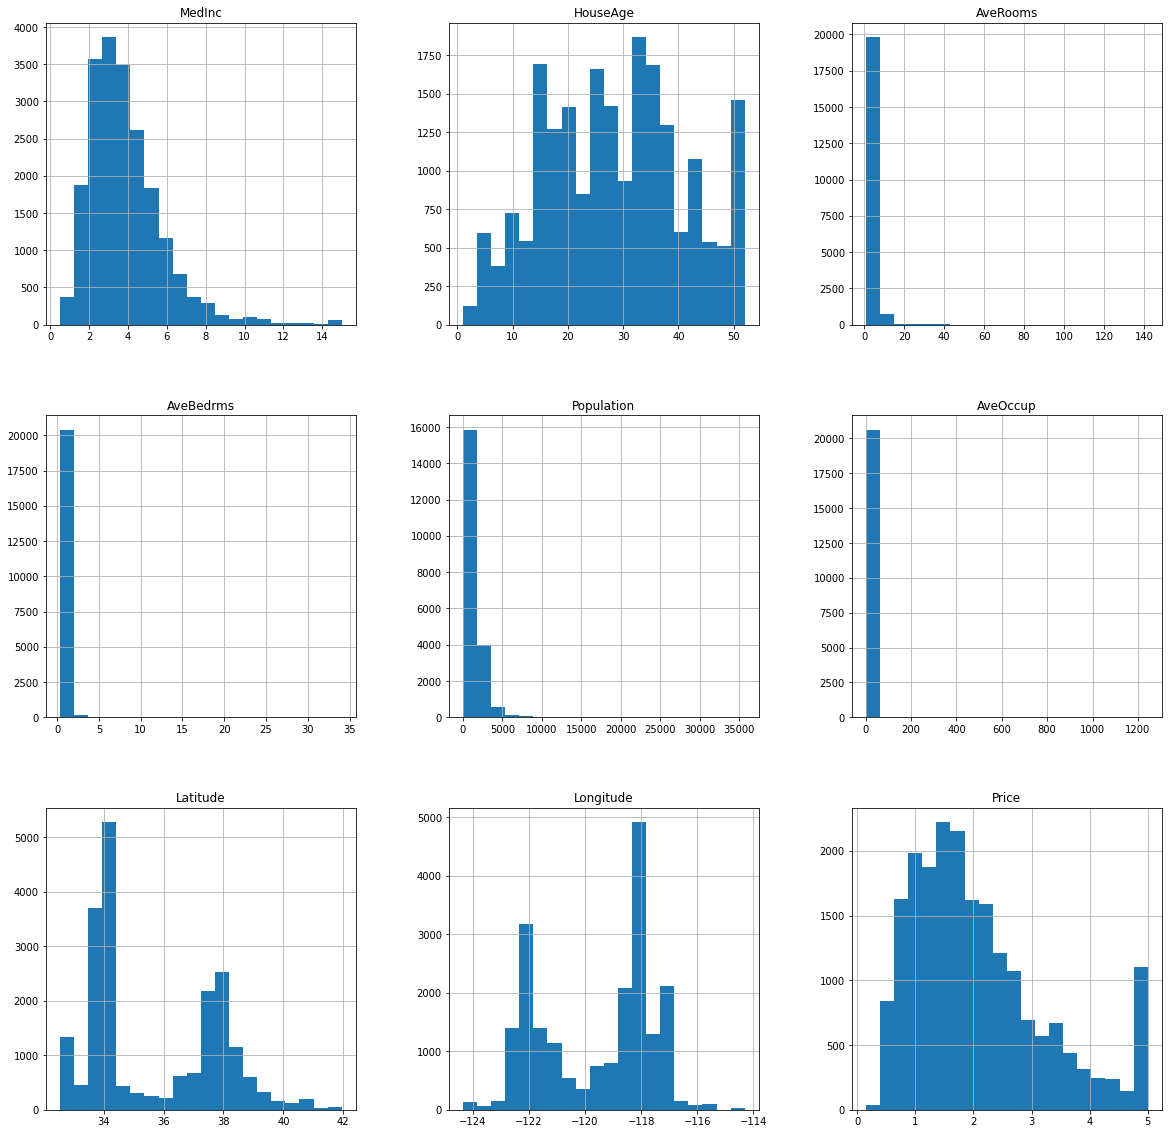

In [11]:
df_housing.hist(figsize=(20,20), bins = 20)
plt.show()

히스토그램에서 얻을 수 있는 정보는 어떤 것이 있을까요?

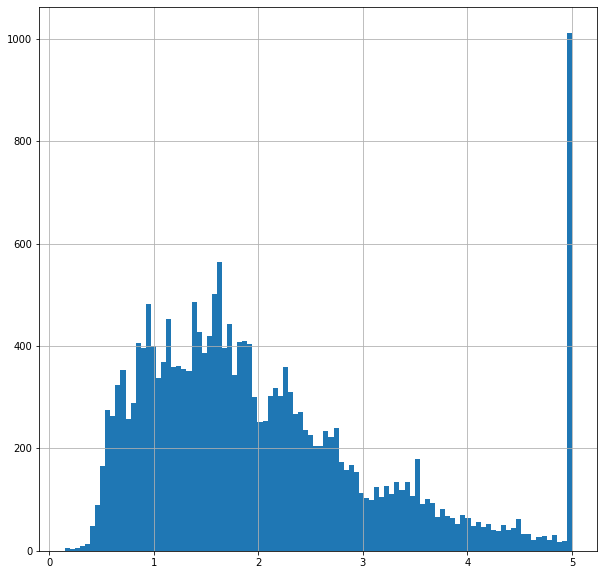

In [12]:
# 우리의 target의 분포를 자세히 살펴볼까요? 히스토그램을 그려보세요! 
df_housing['Price'].hist(figsize=(10,10), bins = 100)
plt.show()

유독 5 이상의 데이터가 많습니다. 해당 데이터들을 자세히 살펴봅시다

In [13]:
df_housing[df_housing['Price'] >= 5.0]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


아, 500,000달러 이상의 집들은 다 5.000001로 통일시킨 건 아닐까? 

이렇게 각 변수의 특징을 살펴본 후에는 변수와 변수 사이의 관계, 특히나 target과 각 변수 사이의 관계를 살펴봅니다. 

Text(0, 0.5, 'Price')

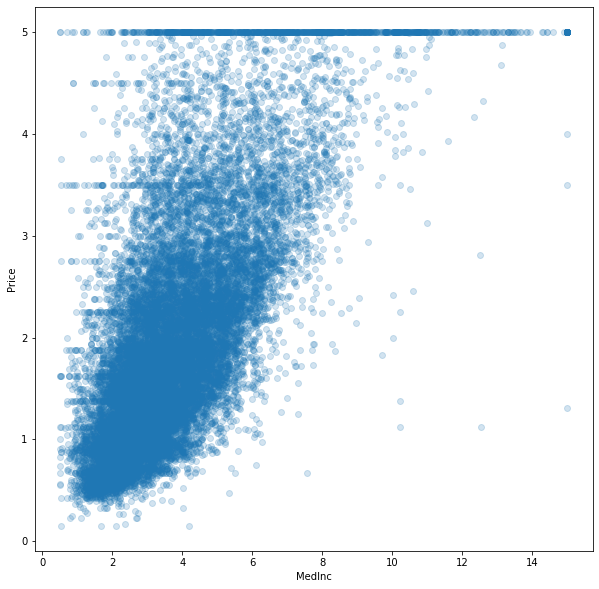

In [14]:
plt.figure(figsize = (10,10))

plt.scatter(df_housing["MedInc"], df_housing['Price'], alpha = 0.2)


plt.xlabel('MedInc')
plt.ylabel('Price')

<Figure size 2160x2160 with 0 Axes>

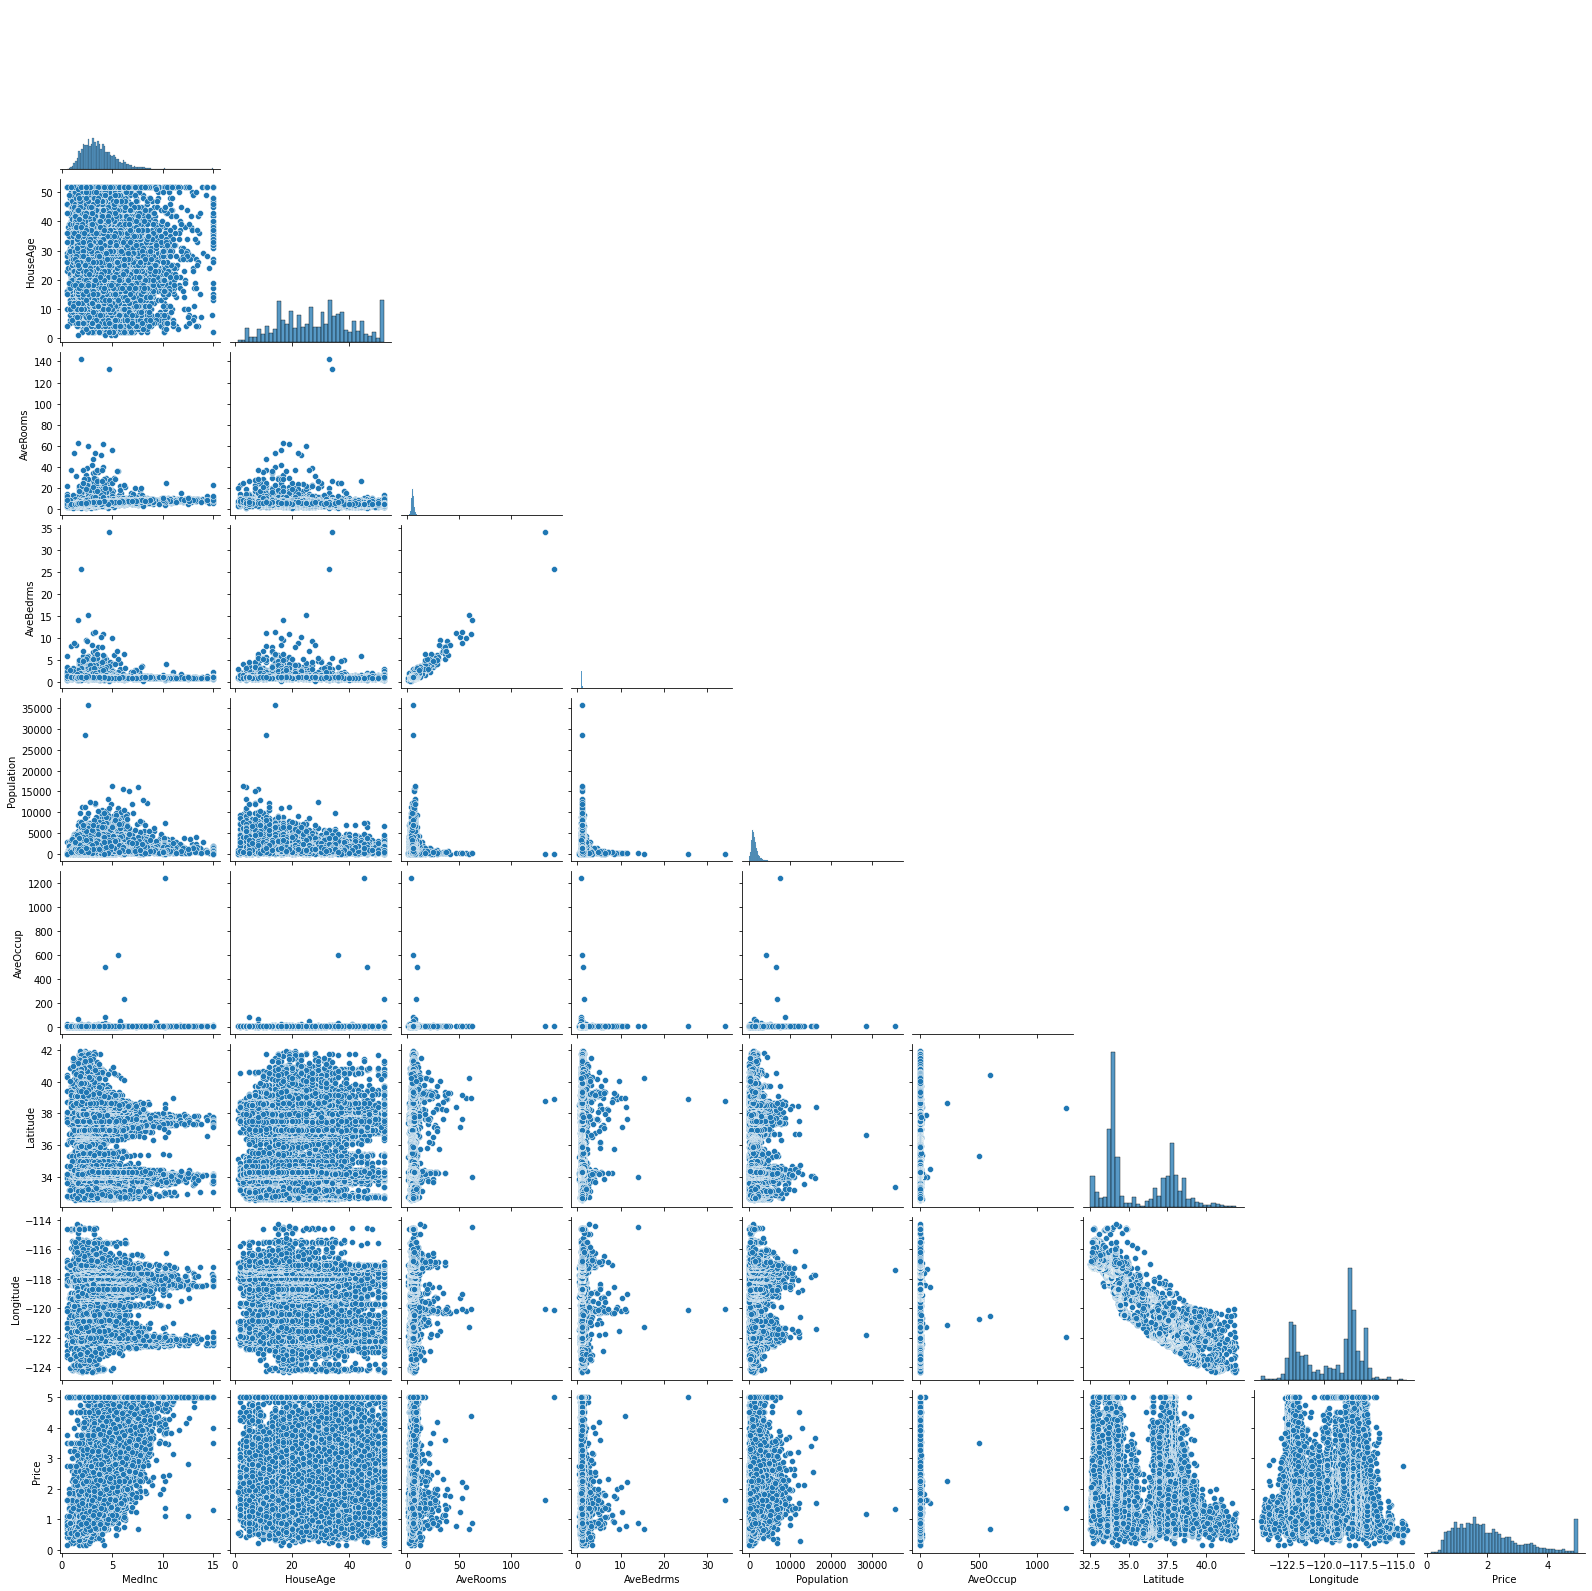

In [16]:
import seaborn as sns
plt.figure(figsize = (30,30))
sns.pairplot(df_housing, corner = True)

# 각 feature 간에 상관관계를 한눈에 파악하기 좋음
# 대각선으로 대칭
# 같은 특성 간에 상관관계는 의미가 없으므로 histogram이 출력

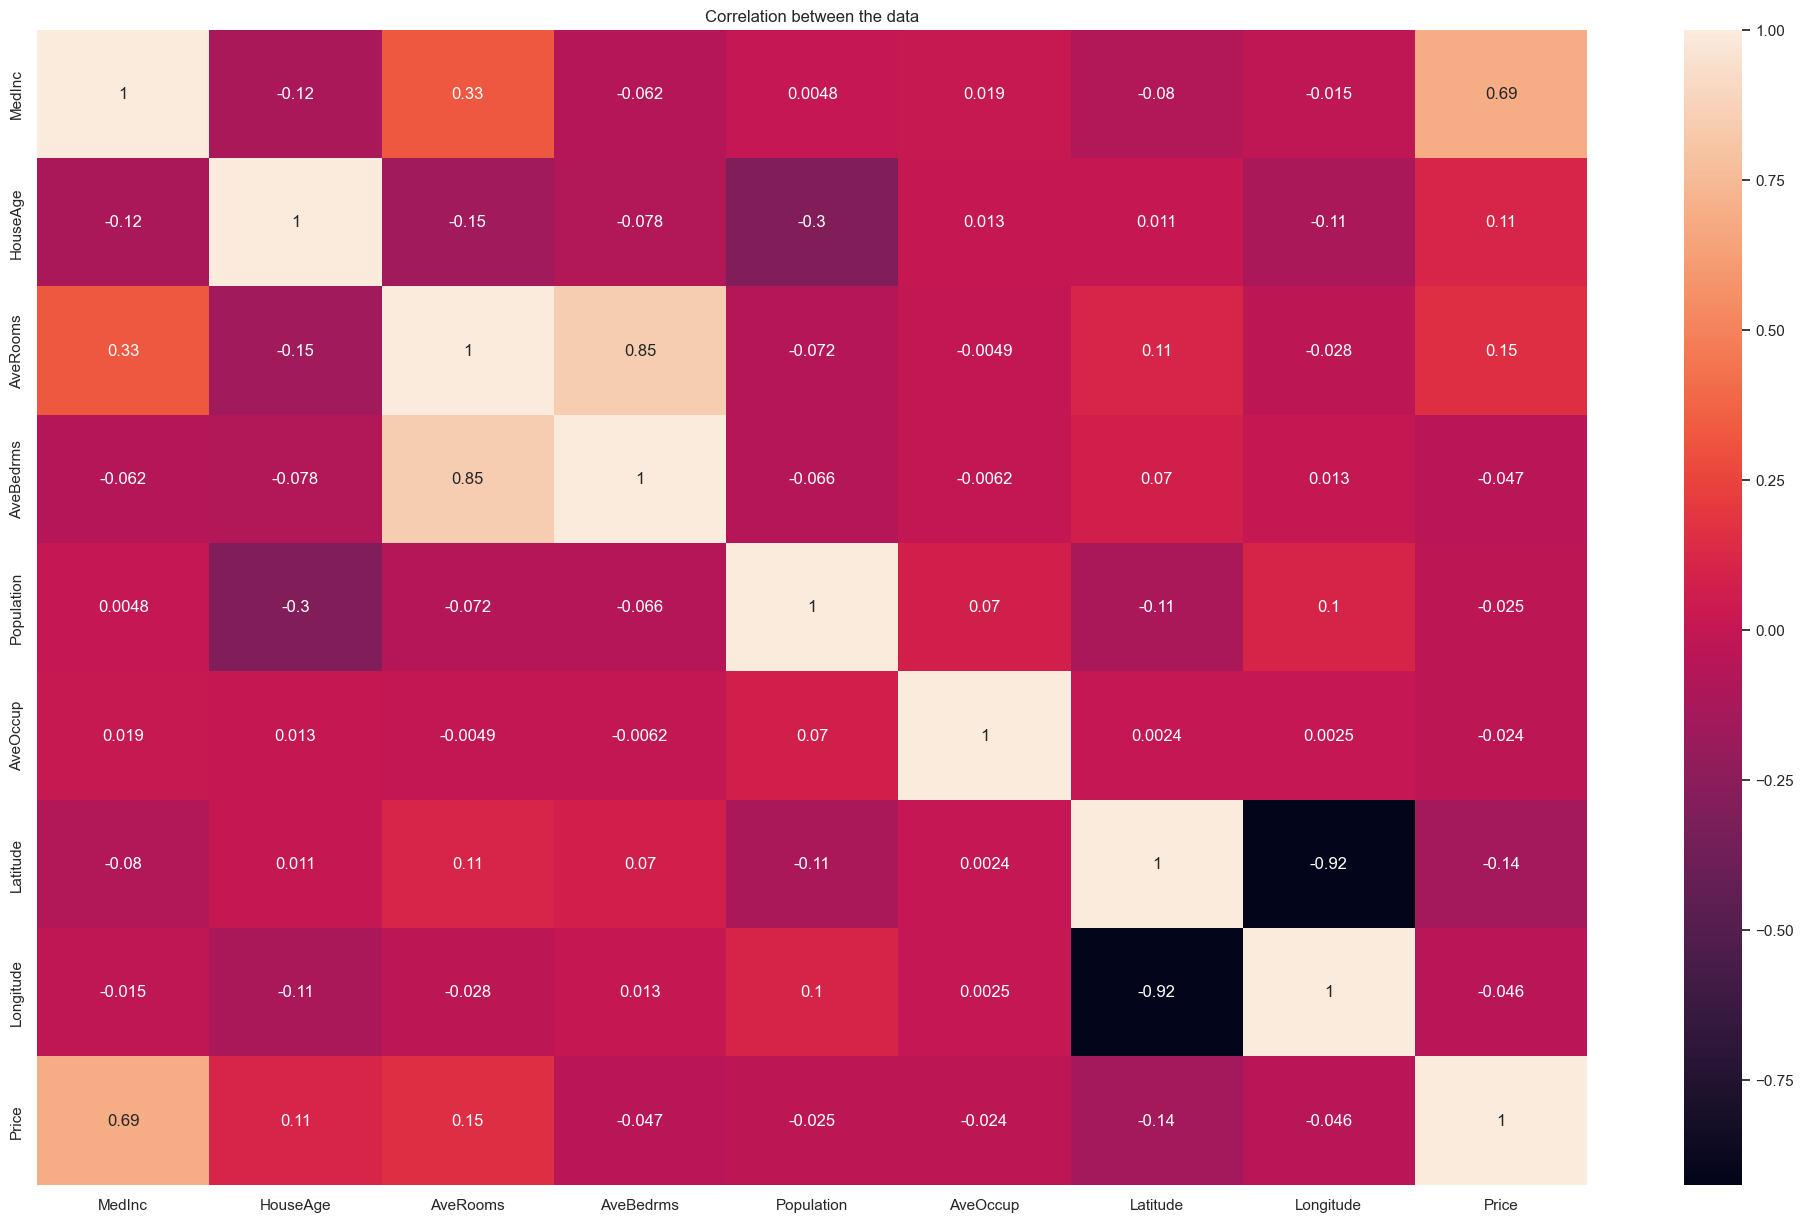

In [ ]:
plt.figure(figsize=(25,15))

# seaborn 
sns.heatmap(df_housing.corr(), annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()

위도와 경도는 어떻게 살펴보는게 좋을까요? 

<Figure size 1000x1000 with 0 Axes>

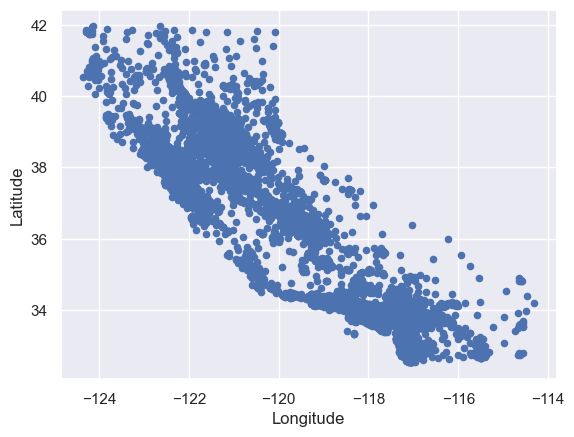

In [ ]:
# 방법 1 : 산점도를 이용해서 대략적인 위치 확인하기

plt.figure(figsize = (10,10))
housing_plot = df_housing.plot(kind='scatter', x='Longitude', y = 'Latitude')

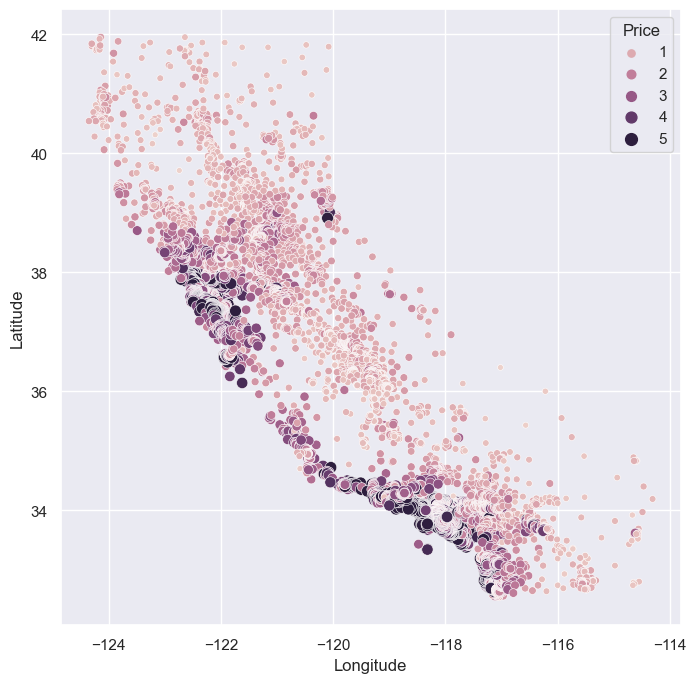

In [ ]:
# 방법 2 : 산점도를 이용해서 대략적인 위치 + 집값 정보까지 함께 표현하기

plt.figure(figsize = (8,8))
housing_plot = sns.scatterplot(data = df_housing, x='Longitude', y = 'Latitude', size = 'Price', hue = 'Price')

어떤 정보를 확인할 수 있나요?

In [ ]:
# 방법 3 : 지도 이미지 위에 산점도를 그릴 수도 있습니다. 
# 구현하고 싶다면 folium 라이브러리를 확인해보세요. 

### 3. 전처리 및 정제(Preprocessing and Cleaning)

데이터 전처리: 데이터를 머신러닝 알고리즘에 넣기 위해 준비하는 과정
- 목표: 학습을 잘 하는 것   
- (1) 무사히 학습을 잘 끝내는 것 (모델의 성능을 포함하여)
- (2) 학습속도가 빨라야 함

사실 지금의 데이터는 sklearn측에서 일차적으로 전처리를 끝낸 데이터이기 때문에 크게 전처리를 하지 않아도 괜찮습니다. 하지만 여러 공공데이터나 직접 데이터를 수집했을 경우에는 다양한 전처리 과정이 필수입니다!

#### 1. 결측치

In [ ]:
# 각 feature의 결측치 개수를 확인하세요 


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

이 데이터는 결측치가 없어서 따로 처리해주지 않아도 괜찮습니다. 

#### Scaling

[문제]
1. 스케일이 작은 feature가 상대적으로 가까워보임
2. 최적화 학습문제(학습속도문제)



##### Sklearn이용 scaling
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

스케일링 시 유의할 점! 
- 학습데이터 세트와 테스트 데이터 세트로 나누어진 경우, 학습 데이터 세트로 fit()이 적ㄷ용된 스케일링 기준 정보를 그대로 테스트 데이터 세트에 적용해야 합니다. 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준을 만들면 학습데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측을 하지 못합니다. 

따라서, 학습데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링을 한다면

1. 가능하다면 전체 데이터의 스케일링 변호나을 적용한 뒤 학습과 테스트 데이터 분리
2. 1번이 힘들다면, 테스트 변환시에는 오직 transform()만 적용하기!    
   학습데이터로 fit()이된 scaler 객체를 그대로 이용하는 것이 포인트! 

In [17]:
# 스케일러 임포트 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
# 스케일러 인스턴스 생성 
std_scaler = StandardScaler()

# 스케일러 피팅 
std_scaler.fit(x_data)

StandardScaler()

In [19]:
# 스케일링 실행 
x_scaled = std_scaler.transform(x_data)
x_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [20]:
# 실행 결과 확인
pd.DataFrame(x_scaled).describe()

,0,1,2,3,4,5,6,7
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [ ]:
# minmax 스케일러 인스턴스 생성
minmax_scaler = MinMaxScaler()

# xdata에 피팅 및 스케일링
x_scaled_mm = minmax_scaler.fit_transform(x_data)
x_scaled_mm

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]])

In [ ]:
pd.DataFrame(x_scaled_mm).describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Encoding 

학습 데이터의 특성들은 수치값 뿐만 아니라 ‘크다’, ‘중간’, ‘작다’ 또는 ‘여자’, ‘남자’와 같은 범주값도 존재합니다. 

먼저 범주형 값을 처리하기 위해서는 이 범주형 값을 수치값으로 변환해야 합니다

이때, 1등급, 2등급, 3등급 처럼 의미에 대소관계, 순위적 연속성 등이 있으면 라벨 인코딩으로 처리를 합니다. 

성별, 과일 등 순위관계가 없으면 각각을 벡터로 치환하는 원핫인코딩을 진행합니다. 

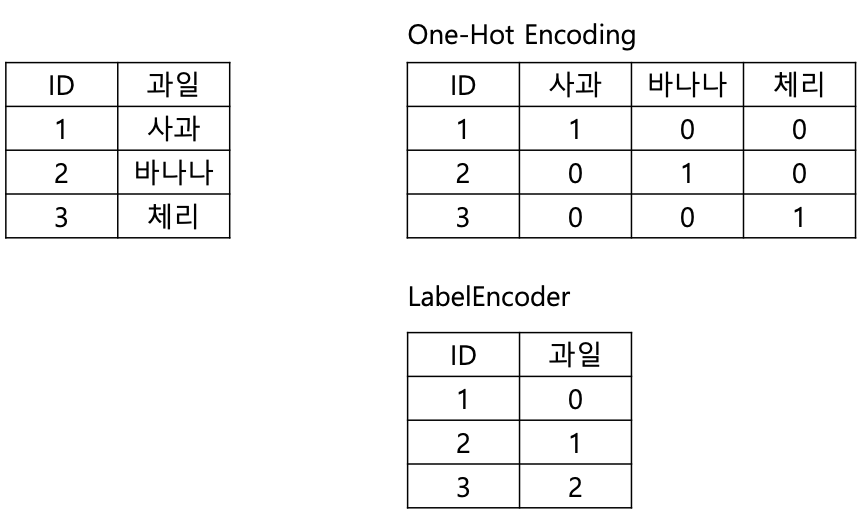

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [ ]:
le.classes_

array(['amsterdam', 'paris', 'tokyo'], dtype='<U9')

In [ ]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [ ]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

원-핫 인코더 실행하기 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
import pandas as pd
df = pd.DataFrame([
    [2,1,'male','A',3],
    [3,2,'female','C',5],
    [3,4,'male','B',7],
    [5,5,'female','A',10],
    [7,5,'female','B',12],
    [2,5,'male','A',7],
    [9,2,'male','C',13]
], columns=['hours', 'attendance', 'sex', 'cate', 'score'])
df

,hours,attendance,sex,cate,score
0,2,1,male,A,3
1,3,2,female,C,5
2,3,4,male,B,7
3,5,5,female,A,10
4,7,5,female,B,12
5,2,5,male,A,7
6,9,2,male,C,13


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

enc.fit(df[['sex']])
print(enc.transform(df[['sex']]))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
enc.categories_[0]

array(['female', 'male'], dtype=object)

In [ ]:
df = pd.concat([df, pd.DataFrame(enc.transform(df[['sex']]), columns =enc.categories_[0])], axis=1)
df.drop("sex", axis=1, inplace = True)

In [ ]:
df

,hours,attendance,cate,score,female,male
0,2,1,A,3,0.0,1.0
1,3,2,C,5,1.0,0.0
2,3,4,B,7,0.0,1.0
3,5,5,A,10,1.0,0.0
4,7,5,B,12,1.0,0.0
5,2,5,A,7,0.0,1.0
6,9,2,C,13,0.0,1.0


In [ ]:
# 방법2 : get_dummies

df = pd.DataFrame([
    [2,1,'male','A',3],
    [3,2,'female','C',5],
    [3,4,'male','B',7],
    [5,5,'female','A',10],
    [7,5,'female','B',12],
    [2,5,'male','A',7],
    [9,2,'male','C',13]
], columns=['hours', 'attendance', 'sex', 'cate', 'score'])

df

,hours,attendance,sex,cate,score
0,2,1,male,A,3
1,3,2,female,C,5
2,3,4,male,B,7
3,5,5,female,A,10
4,7,5,female,B,12
5,2,5,male,A,7
6,9,2,male,C,13


In [ ]:
sex=pd.get_dummies(df['sex'],prefix='sex')
df=pd.concat([df,sex],axis=1)
df.head()

,hours,attendance,sex,cate,score,sex_female,sex_male
0,2,1,male,A,3,0,1
1,3,2,female,C,5,1,0
2,3,4,male,B,7,0,1
3,5,5,female,A,10,1,0
4,7,5,female,B,12,1,0


df_housing은 카테고리형 데이터가 없어서 이부분은 진행하지 않습니다. 

### 4. 모델링 및 훈련(Modeling and Training)

학습에 들어가기 전, 학습데이터와 테스트 데이터를 분리하겠습니다.    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_train)
y_pred

array([1.93725845, 2.48910616, 2.64735483, ..., 2.03879912, 2.84075139,
       2.27373156])

모델의 성능을 확인해봅시다. 

In [ ]:
# 학습데이터
model.score(X_train, y_train)

0.6125511913966952

In [ ]:
# test 데이터 
model.score(X_test, y_test)

0.575787706032451

In [ ]:
mean_squared_error?

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred)

train_mse = np.sqrt(train_mse)
train_mse

0.7196757085831574

In [ ]:
y_pred_test = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred_test)

test_mse = np.sqrt(test_mse)
test_mse

0.7455813830127763

In [ ]:
model.coef_

array([ 0.85238169,  0.12238224, -0.30511591,  0.37113188, -0.00229841,
       -0.03662363, -0.89663505, -0.86892682])

모델의 성능을 높이고 싶다면 어떻게 해야 할까? 

1. 모델 파라미터를 수정하거나
2. 데이터 수집이나 전처리 과정을 수정하거나
3. 또 다른 모델 알고리즘을 실험하거나 

다양한 방법이 있습니다. 우리는 다른 모델을 배우기 전이므로 모델 파라미터 수정부터 배워봅시다. 

### 5. 교차검증

우선 교차 검증부터 해봅시다. 교차검증은 sklearn에 `cross_val_score()` 함수를 이용하여 간편하게 진행할 수 있습니다. 

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

# 성능지표는 r2, 교차 검증 세트는 3개
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)

print("교차 검증별 정확도 : ", np.round(scores, 4))
print("평균 검증 정확도 : ", np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.6127 0.6173 0.6033]
평균 검증 정확도 :  0.6111


이번에는 최적 하이퍼 파라미터 튜닝과 교차검증을 한번에 해봅시다.   
여러 탐색 함수들이 있지만 GridSearchCV를 사용해보겠습니다. 

GridSearchCV는 입력한 파라미터의 조합 중에서 최고 성능을 가지는 파라미터 조합을 찾아주는 함수입니다.   
우선 탐색하고자 하는 파라미터 집합을 만듭니다. 

사실 선형회귀는 선택할 파라미터 조합이 매우 한정적이지만, GridSearchCV의 사용법을 익히기 위해 작성해보겠습니다. 

In [ ]:
LinearRegression?

In [ ]:
from sklearn.model_selection import GridSearchCV 
    
model = LinearRegression()


grid_params = {
     'fit_intercept' : [True, False],
     'normalize' : [True, False]
 }

grid_linear = GridSearchCV(model, param_grid = grid_params, cv=3, refit = True ,  scoring='r2')

# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환 

grid_linear.fit(X_train, y_train)

/Users/esoyeon/miniforge3/envs/env_sl/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/esoyeon/miniforge3/envs/env_sl/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [ ]:
# 결과 확인
pd.DataFrame(grid_linear.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007181,0.002432,0.000591,0.000179,True,True,"{'fit_intercept': True, 'normalize': True}",0.612692,0.617258,0.603326,0.611092,0.005799,1
1,0.004519,0.000252,0.000469,0.000092,True,False,"{'fit_intercept': True, 'normalize': False}",0.612692,0.617258,0.603326,0.611092,0.005799,2
2,0.003680,0.000542,0.000482,0.000219,False,True,"{'fit_intercept': False, 'normalize': True}",-2.571468,-2.642502,-2.588717,-2.600896,0.030251,3
3,0.002518,0.000483,0.000246,0.000035,False,False,"{'fit_intercept': False, 'normalize': False}",-2.571468,-2.642502,-2.588717,-2.600896,0.030251,3


In [ ]:
pd.DataFrame(grid_linear.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'fit_intercept': True, 'normalize': True}",0.611092,1,0.612692,0.617258,0.603326
1,"{'fit_intercept': True, 'normalize': False}",0.611092,2,0.612692,0.617258,0.603326
2,"{'fit_intercept': False, 'normalize': True}",-2.600896,3,-2.571468,-2.642502,-2.588717
3,"{'fit_intercept': False, 'normalize': False}",-2.600896,3,-2.571468,-2.642502,-2.588717
